<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 211.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 144.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 175.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 172.3 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


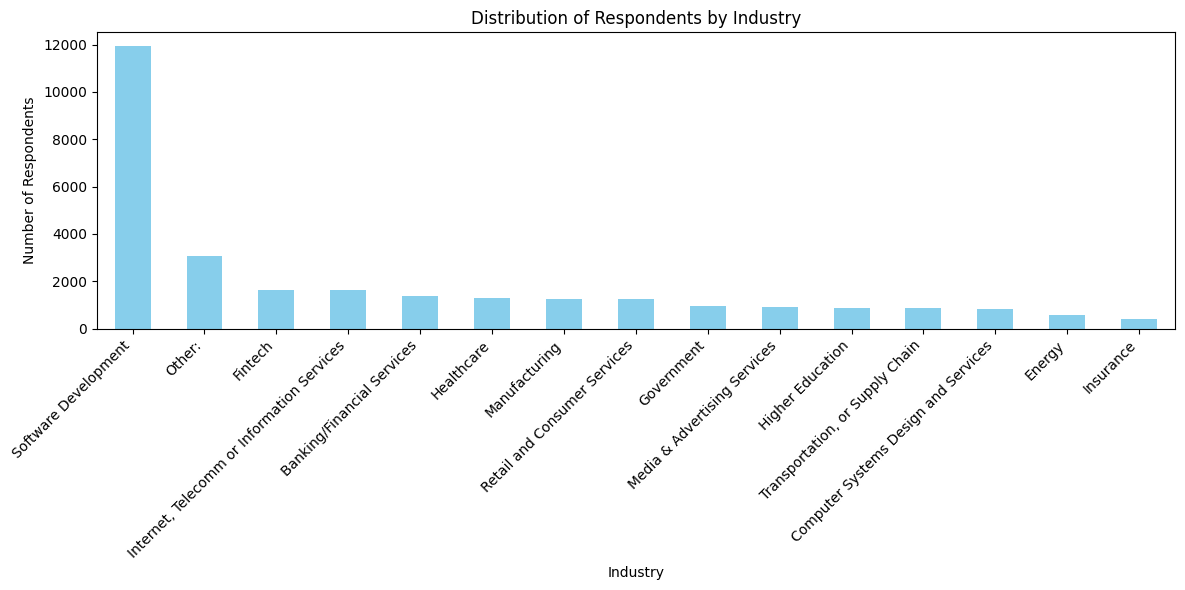

In [7]:
##Write your code here
industry_counts = df['Industry'].value_counts()
    
# Create a bar chart
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='skyblue')
    
# Add labels and title
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
    
# Show the plot
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [12]:
##Write your code here
comp_mean = df['ConvertedCompYearly'].mean()
comp_median = df['ConvertedCompYearly'].median()
comp_std = df['ConvertedCompYearly'].std()

# Define threshold (3 standard deviations above the mean)
threshold = comp_mean + (3 * comp_std)

# Identify outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

# Print the number of outliers and display them
print(f"Number of outliers: {len(outliers)}")
print("\nOutliers:")
print(outliers[['ConvertedCompYearly']].head(10))



Number of outliers: 89

Outliers:
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0
2316            1000000.0
2592             800000.0
3024            1302817.0
5934            1031099.0
6735             650000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


First Quartile (Q1): 32712.0
Third Quartile (Q3): 107971.5
Interquartile Range (IQR): 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of outliers: 978
Percentage of outliers: 1.49%


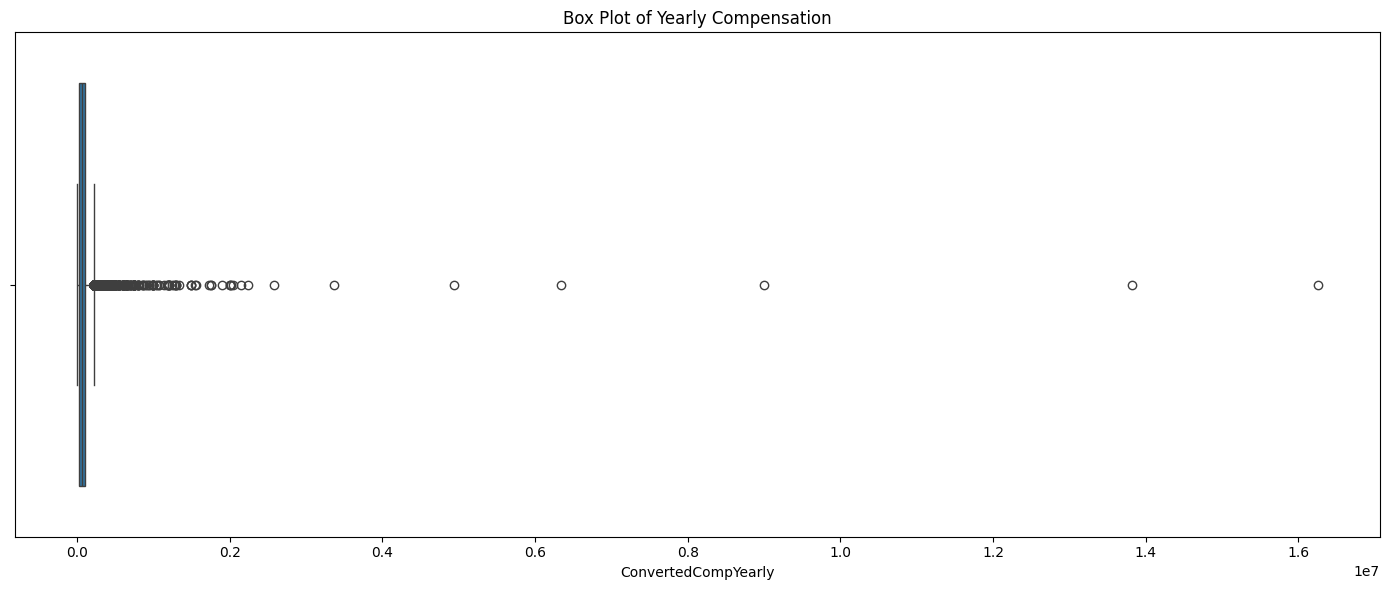

In [18]:
##Write your code here
# Calculate the IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Print the quartile values and IQR
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count outliers
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")

plt.figure(figsize=(14, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.tight_layout()
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original DataFrame size: 65437 rows
New DataFrame size (without outliers): 22457 rows
Number of outliers removed: 42980 rows


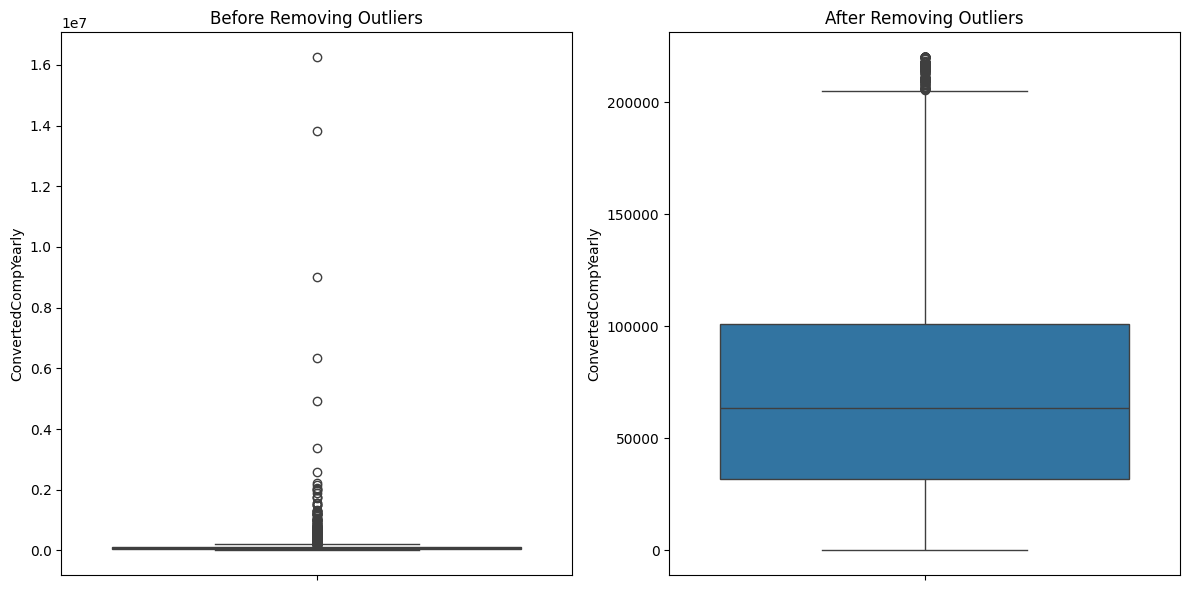

In [24]:
##Write your code here
# Create a new DataFrame excluding the outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]
outliers_removed = original_size - new_size

print(f"Original DataFrame size: {original_size} rows")
print(f"New DataFrame size (without outliers): {new_size} rows")
print(f"Number of outliers removed: {outliers_removed} rows")

# Visualize the distribution before and after removing outliers
plt.figure(figsize=(12, 6))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(df['ConvertedCompYearly'])
plt.title('Before Removing Outliers')
plt.ylabel('ConvertedCompYearly')

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(df_no_outliers['ConvertedCompYearly'])
plt.title('After Removing Outliers')
plt.ylabel('ConvertedCompYearly')

plt.tight_layout()
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


                  Age  Age_Numeric
0  Under 18 years old         16.0
1     35-44 years old         40.0
2     45-54 years old         50.0
3     18-24 years old         21.0
4     18-24 years old         21.0
Correlations with Age:
Age_Numeric            1.000000
WorkExp                0.848803
ConvertedCompYearly    0.122133
JobSat                 0.069818
CompTotal             -0.002698
JobSatPoints_1        -0.027675
ResponseId            -0.038245
JobSatPoints_8        -0.046204
JobSatPoints_6        -0.050017
JobSatPoints_4        -0.076150
JobSatPoints_9        -0.081759
JobSatPoints_7        -0.083232
JobSatPoints_5        -0.101560
JobSatPoints_11       -0.107170
JobSatPoints_10       -0.114571
Name: Age_Numeric, dtype: float64


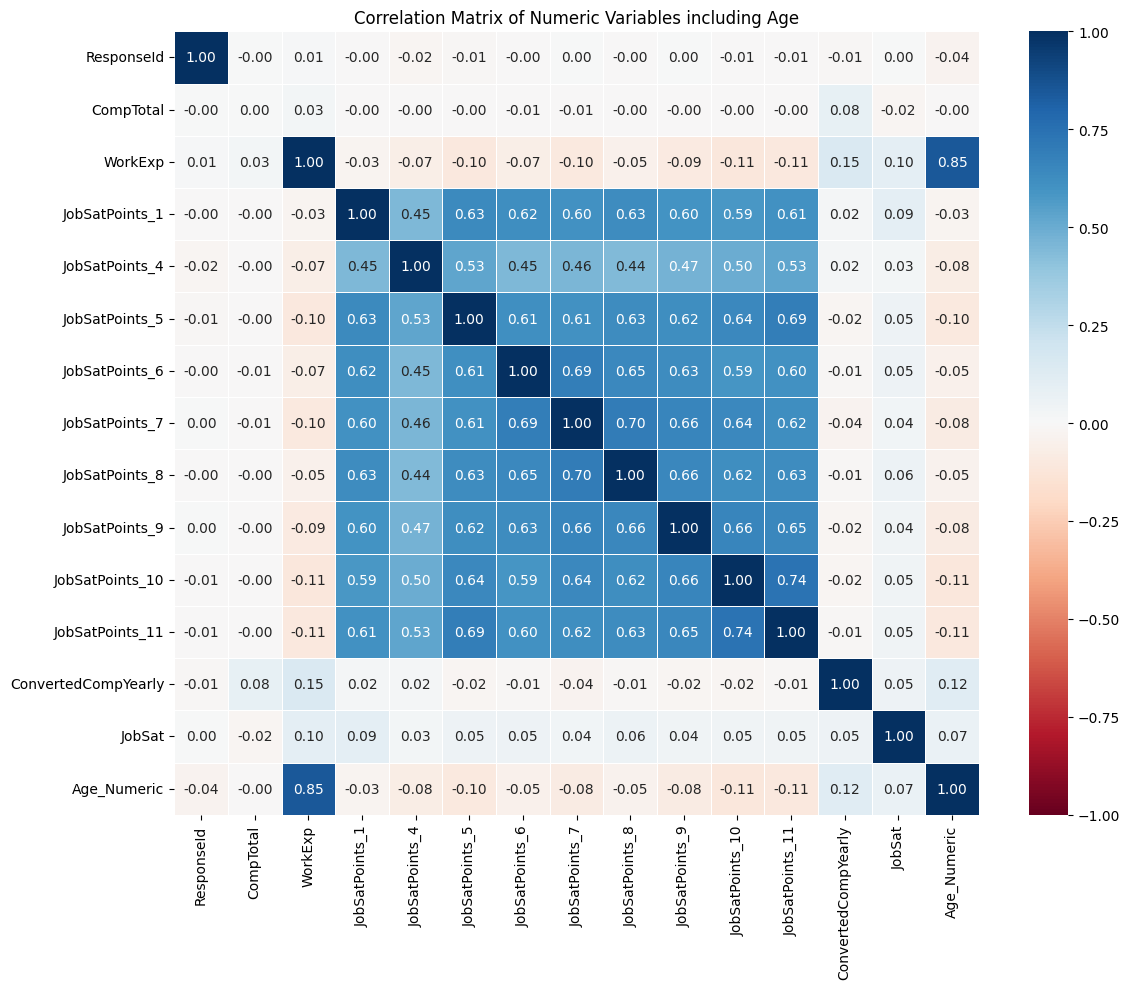

In [29]:
##Write your code here
!pip install numpy
import numpy as np

# Define a function to map age categories to numeric values
def map_age_to_numeric(age_category):
    if pd.isna(age_category):
        return np.nan
    
    # Map age categories to approximate middle values
    age_mapping = {
        'Under 18 years old': 16,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': np.nan  # Handle non-responses
    }   
    return age_mapping.get(age_category, np.nan)

# Apply the mapping function to transform Age column
df['Age_Numeric'] = df['Age'].apply(map_age_to_numeric)

# Check the result
print(df[['Age', 'Age_Numeric']].head())

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Make sure Age_Numeric is included
if 'Age_Numeric' not in numeric_columns:
    numeric_columns = ['Age_Numeric'] + list(numeric_columns)

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Focus on correlations with Age
age_correlations = correlation_matrix['Age_Numeric'].sort_values(ascending=False)
print("Correlations with Age:")
print(age_correlations)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables including Age')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
